In [1]:
# you can import as anything else but standard seems to be np
# then you have access to all the library functions by doing np.sin() for example
import numpy as np
import math

# to plot :) 
import matplotlib.pyplot as plt

In [2]:
# sqrt()
# from the math library you can only do one element at a time
a = math.sqrt(2.)
print(a)


1.4142135623730951


In [3]:
# if you have a list
num = [2, 3, 4, 5]

# with the math library you would have to loop it
sqrt_num = []
for i in range(0, len(num)):
  sqrt_num.append(math.sqrt(num[i]))
print(sqrt_num)

# there is also other way do to the same loop
sqrt_num = []
for i in num:
  sqrt_num.append(math.sqrt(i))
print(sqrt_num)

[1.4142135623730951, 1.7320508075688772, 2.0, 2.23606797749979]
[1.4142135623730951, 1.7320508075688772, 2.0, 2.23606797749979]


In [4]:
# using numpy you have access to vector operation
# similar to what you have in matlab and you avoid
# having to loop the list (also much faster)

# only thing the num list have to be define as a numpy array!
num = np.array([2, 3, 4, 5])

# all the operations perform with numpy array will return numpy array
sqrt_num = np.sqrt(num)
print(sqrt_num)

p2 = num**2
print(p2)

pn = np.power(num, 2)
print(pn)

[1.41421356 1.73205081 2.         2.23606798]
[ 4  9 16 25]
[ 4  9 16 25]


In [5]:
# you have access to most of the matlab operations
# but there are some differences
# By default, it does element-wise multiplication and not
# matrix/vector operation as in Matlab

# this will give you the multiplication of each row of a 
# by the vector b
a = np.array([[1, 2], [3, 4]])
b = np.array([5, 6])
c = a * b
print(c)

# if you want to do a matrix multiplication
# you can use np.matmul() or @
d = np.matmul(a, b)
print(d)
# or simply using @
d = a @ b
print(d)

[[ 5 12]
 [15 24]]
[17 39]
[17 39]


In [6]:
# same thing for / which will divide element-wise
# to solve a system you can use numpy.linalg.solve() or scipy.linal.solve()
# let's keep only the numpy package for now
e = a / b
print(e)

f = np.linalg.solve(a, b)
print(f)

[[0.2        0.33333333]
 [0.6        0.66666667]]
[-4.   4.5]


# There are so many functions available but here are some I used..

List: https://docs.scipy.org/doc/numpy/reference/routines.html


In [7]:
def print_basic_stats(v):
    """
    Replicate a very dumb version of panda.describe() function for a simple numpy array
    :param v: numpy array with a signal or dataset
    :return: print stats on the screen
    """
    print('\nmean\t\t%f\nstd\t\t%f\nmin\t\t%f\n25%%\t\t%f\n50%%\t\t%f\n75%%\t\t%f\nmax\t\t%f' % (
        np.mean(v), np.std(v), np.min(v), np.percentile(v, 25), np.percentile(v, 50), np.percentile(v, 75), np.max(v)))

a = [1, 1, 2.4, 5, 12, 23, 2, 5, 6, 1, 34, 34.34]
print_basic_stats(a)


mean		10.561667
std		12.139502
min		1.000000
25%		1.750000
50%		5.000000
75%		14.750000
max		34.340000


In [8]:
print(np.unique(a))
print(np.ones(10))
print(np.ones((2,2)))
print(np.zeros((2,2)))

[ 1.    2.    2.4   5.    6.   12.   23.   34.   34.34]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[[1. 1.]
 [1. 1.]]
[[0. 0.]
 [0. 0.]]


/Users/pmiron/miniconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


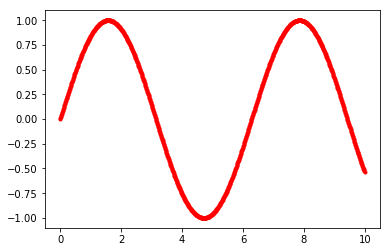

In [9]:
x = np.arange(0, 10, 0.01)
# np.sin(), np.cos(),  np.deg2rad(), (np.radians()), np.rad2deg() (np.degrees()), np.pi
# np.real(), np.imag(), np.angle(),
y = np.sin(x) 

plt.plot(x, y, '.r')

In [10]:
a = np.array([[1, 2], [3, 4]])

# transpose
print(a.T)

# reshape
print(a.reshape(1,4))
print(a.reshape(1,-1)) # -1 is to the end

# access element similar as in matlab but starts at 0
print(a[0]) # first line
print(a[0,0]) # first element
print(a[-1]) # last line
print(a[:,1]) # second column

[[1 3]
 [2 4]]
[[1 2 3 4]]
[[1 2 3 4]]
[1 2]
1
[3 4]
[2 4]


Text(0, 0.5, 'Amplitude')

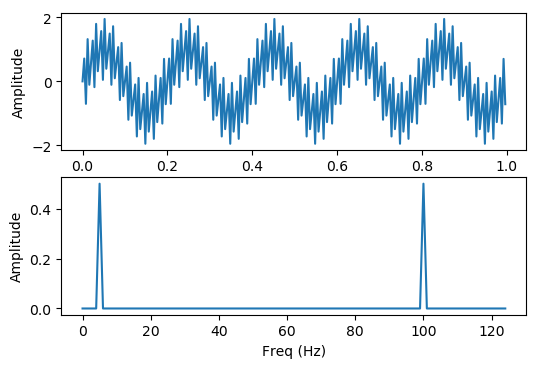

In [11]:
## FFT example
x = np.arange(0, 10, 0.01)
y = np.sin(x) 

# sampling parameters
fs = 250.0 # have to be > 2x highest frequency
ts = 1.0/fs

# signal parameters
t = np.arange(0,1,ts)
freq = 5
freq2 = 100
y = np.sin(2*np.pi*freq*t)  + np.sin(2*np.pi*freq2*t)

# output frequency normalization
n = len(y)
T = n/fs
frq = np.arange(n)/T

Y = np.fft.fft(y)
# keep one half of range and output
frq = frq[0:int(n/2)] 
# and normalize fft output
Y = Y[0:int(n/2)]/n 

# this is a better way to do figures
# you keep reference to the fig and ax1, ax2
# to be aple to modify them later on
fig = plt.figure(dpi=100)
ax1 = fig.add_subplot(2, 1, 1)

# plot original signal
ax1.plot(t,y)
ax1.set_xlabel('Time')
ax1.set_ylabel('Amplitude')

# plot fft results
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(frq, abs(Y))
ax2.set_xlabel('Freq (Hz)')
ax2.set_ylabel('Amplitude')

# show the figure if you are not on a notebook
#fig.show()

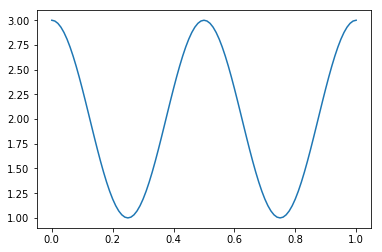

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Example data
t = np.arange(0.0, 1.0 + 0.01, 0.01)
s = np.cos(4 * np.pi * t) + 2

#plt.rc('text', usetex=True)
plt.plot(t, s)

plt.show()